## Introduction :
- Yelp is a which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

- Yelp was founded in 2004 by former PayPal employees. By 2010 it had $30 million in revenues and the website had published more than 4.5 million crowd-sourced reviews.

**Attribues of review table are as following :**

    review_id: ID of the review
    user_id: ID of the user
    business_id: ID of the business
    stars: ratings of the business
    date: review date
    text: review from the user
    useful: number of users who vote a review as usefull
    funny: number of users who vote a review as funny
    cool: number of users who vote a review as cool

### Import Libraries

In [1]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Import Dataset

In [2]:
reviews = pd.read_csv('yelp_review.csv')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [4]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [5]:
reviews.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0


In [6]:
reviews.describe()

,stars,useful,funny,cool
count,5261668.0000,5261668.0000,5261668.0000,5261668.0000
mean,3.7277,1.3851,0.5092,0.5861
std,1.4336,4.5287,2.6862,2.2337
min,1.0000,-1.0000,0.0000,-1.0000
25%,3.0000,0.0000,0.0000,0.0000
50%,4.0000,0.0000,0.0000,0.0000
75%,5.0000,2.0000,0.0000,1.0000
max,5.0000,3364.0000,1481.0000,1105.0000


In [47]:
reviews["text"][4]

"Had their chocolate almond croissant and it was amazing! So light and buttery and oh my how chocolaty.\n\nIf you're looking for a light breakfast then head out here. Perfect spot for a coffee\\/latté before heading out to the old port"

### Dataset Visualization

In [9]:
reviews['length'] = reviews['text'].apply(len)

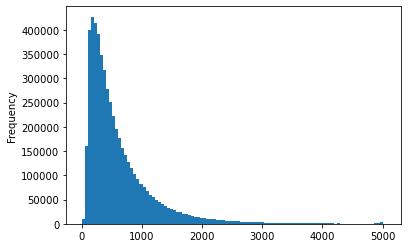

In [13]:
reviews['length'].plot(bins=100,kind = "hist");

In [14]:
reviews['length'].describe()

count   5261668.0000
mean        611.8673
std         572.1642
min           1.0000
25%         242.0000
50%         434.0000
75%         780.0000
max        5056.0000
Name: length, dtype: float64

In [ ]:
## The max review

In [15]:
reviews[reviews['length'] == 5056]['text'].iloc[0]

'On the day of execution, on the day of execution\n"Only women kneel and smile, ah-ah, ah-ah"\n\n-----------------------------------------\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad-------------------\n\nIn A Sentence™\nAll shiny and slick with a badass parking garage; however, it\'s a slimy shitshow .\n\nQuick Review™\n+   Artwork all around. Relatively vertical parking garage with sensor lights to notify of empty carports. Centrally located and accessible from the west via a bridge to avoid the boulevard.  \n\n+\\/- Venues: Book\\/Stage (defunct), Bond, Boulevard Pool, Chandelier, Chelsea, Rose.Rabbit.Lie.\n\n-    Where to start? It\'s a fucking shitshow: bunch of nickel and diming amateurs. \n\nEmployee of Excellence™ \nUnknown names: they used to work at Book\\/Stage and probably all got fired.\n\n-----------------------------------------\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad\xad-------------------\n\nI have some personal experiences here.

In [ ]:
## The min review

In [16]:
reviews[reviews['length'] == 1]['text'].iloc[0]

'O'

In [ ]:
## The mean review

In [17]:
reviews[reviews['length'] == 611]['text'].iloc[0]

"Kantapia is great for what it is - a quick eats restaurant in a student area. \n\nThe seating isn't spectacular, the ambience is bare but there is a lively buzz to the restaurant that is endearing. \n\nThe staff are friendly and give advice on what to order and take the time to explain the more complicated menu items. The food is okay - the portions are generous. \n\nThey have specifically marked vegetarian items on the menu which is a really great point and are sweet to warn that the broth for their ramen is chicken based. \n\nGo on a cold day when you're close by and are looking for a good meal to warm you up."

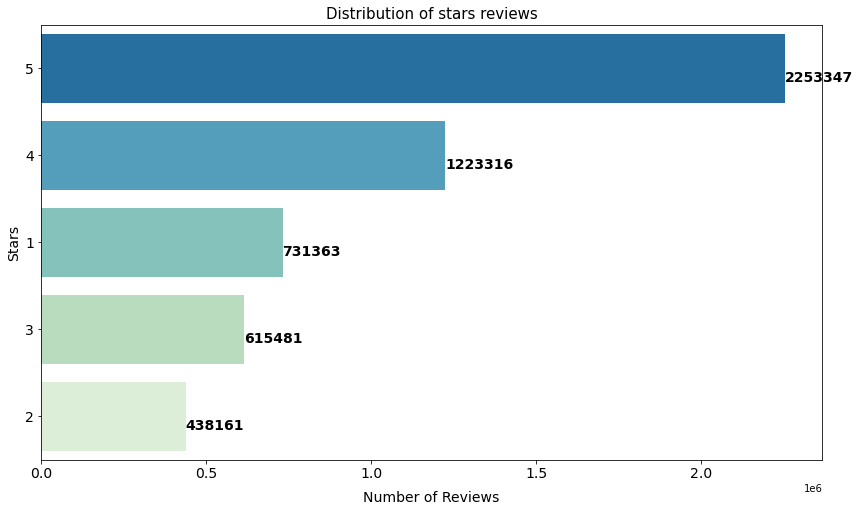

In [21]:
plt.figure(figsize=(14,8))
ind_reviews = reviews.stars.value_counts()
sns.countplot(y='stars',data=reviews, 
              order = ind_reviews.index, palette= sns.color_palette("GnBu_r", len(ind_reviews)))
plt.title('Distribution of stars reviews', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=14, labelpad=10)
plt.ylabel('Stars', fontsize=14)
plt.tick_params(labelsize=14)
for  m, n in enumerate(reviews.stars.value_counts()):
    plt.text(n, m+0.15, str(n), fontweight='bold', fontsize=14)

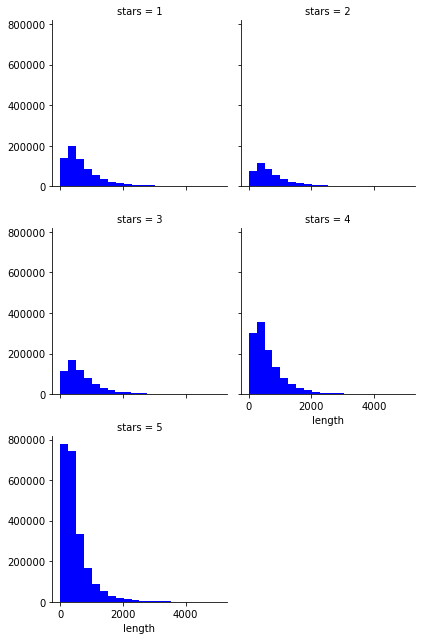

In [25]:
## Show the 5 stars column each one in seperate graph
vis_5s = sns.FacetGrid(data=reviews ,col="stars",col_wrap= 2)
vis_5s.map(plt.hist,"length",bins = 20,color = "b")

In [26]:
df_stars_1 = reviews[reviews['stars'] == 1]
df_stars_5 = reviews[reviews['stars'] == 5]

In [27]:
df_stars_1.shape,df_stars_5.shape

((731363, 10), (2253347, 10))

In [28]:
df_stars_1_5 = pd.concat([df_stars_1,df_stars_5])

In [29]:
df_stars_1_5.shape

(2984710, 10)

In [35]:
print("1 star percentage = ",(df_stars_1.shape[0]/df_stars_1_5.shape[0] * 100)," %")

1 star percentage =  24.50365362128984  %


In [36]:
print("5 star percentage = ",(df_stars_5.shape[0]/df_stars_1_5.shape[0] * 100)," %")

5 star percentage =  75.49634637871016  %


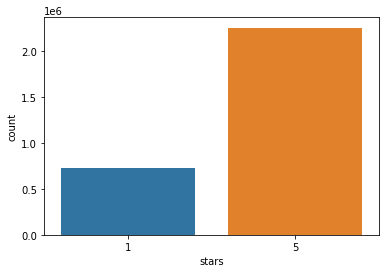

In [40]:
sns.countplot(df_stars_1_5['stars'],label = "Counts");

### Data Preparation : Create Train and Test Datasets

#### Remove punctuation

In [41]:
from string import punctuation

In [42]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
sample_review = reviews["text"][4]

In [55]:
print(sample_review)

Had their chocolate almond croissant and it was amazing! So light and buttery and oh my how chocolaty.

If you're looking for a light breakfast then head out here. Perfect spot for a coffee\/latté before heading out to the old port


In [51]:
punc_removed = [char for char in sample_review if char not in punctuation]

In [52]:
punc_removed

['H',
 'a',
 'd',
 ' ',
 't',
 'h',
 'e',
 'i',
 'r',
 ' ',
 'c',
 'h',
 'o',
 'c',
 'o',
 'l',
 'a',
 't',
 'e',
 ' ',
 'a',
 'l',
 'm',
 'o',
 'n',
 'd',
 ' ',
 'c',
 'r',
 'o',
 'i',
 's',
 's',
 'a',
 'n',
 't',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'i',
 't',
 ' ',
 'w',
 'a',
 's',
 ' ',
 'a',
 'm',
 'a',
 'z',
 'i',
 'n',
 'g',
 ' ',
 'S',
 'o',
 ' ',
 'l',
 'i',
 'g',
 'h',
 't',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'b',
 'u',
 't',
 't',
 'e',
 'r',
 'y',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'o',
 'h',
 ' ',
 'm',
 'y',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 'c',
 'h',
 'o',
 'c',
 'o',
 'l',
 'a',
 't',
 'y',
 '\n',
 '\n',
 'I',
 'f',
 ' ',
 'y',
 'o',
 'u',
 'r',
 'e',
 ' ',
 'l',
 'o',
 'o',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'a',
 ' ',
 'l',
 'i',
 'g',
 'h',
 't',
 ' ',
 'b',
 'r',
 'e',
 'a',
 'k',
 'f',
 'a',
 's',
 't',
 ' ',
 't',
 'h',
 'e',
 'n',
 ' ',
 'h',
 'e',
 'a',
 'd',
 ' ',
 'o',
 'u',
 't',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'P',
 'e',
 'r',
 'f',
 'e',
 'c',
 '

In [53]:
punc_removed_joined = ''.join(punc_removed)

In [57]:
## Before punctuation removed
print(sample_review)

Had their chocolate almond croissant and it was amazing! So light and buttery and oh my how chocolaty.

If you're looking for a light breakfast then head out here. Perfect spot for a coffee\/latté before heading out to the old port


In [56]:
## After punctuation removed
print(punc_removed_joined)

Had their chocolate almond croissant and it was amazing So light and buttery and oh my how chocolaty

If youre looking for a light breakfast then head out here Perfect spot for a coffeelatté before heading out to the old port


#### Remove Stop Words

In [59]:
from nltk.corpus import stopwords
##stopwords.words("english")

In [60]:
remove_stop_words = [word for word in punc_removed_joined.split() if word.lower() not in stopwords.words("english")]

In [61]:
remove_stop_words

['chocolate',
 'almond',
 'croissant',
 'amazing',
 'light',
 'buttery',
 'oh',
 'chocolaty',
 'youre',
 'looking',
 'light',
 'breakfast',
 'head',
 'Perfect',
 'spot',
 'coffeelatté',
 'heading',
 'old',
 'port']

In [64]:
remove_stop_words_joined = ' '.join(remove_stop_words)

In [66]:
## Before stop words removed
print(punc_removed_joined)

Had their chocolate almond croissant and it was amazing So light and buttery and oh my how chocolaty

If youre looking for a light breakfast then head out here Perfect spot for a coffeelatté before heading out to the old port


In [67]:
## After stop words removed
print(remove_stop_words_joined)

chocolate almond croissant amazing light buttery oh chocolaty youre looking light breakfast head Perfect spot coffeelatté heading old port


#### Count Vectorizer

In [70]:
from sklearn.feature_extraction.text  import CountVectorizer

vectorizer = CountVectorizer()
sentence = vectorizer.fit_transform([sample_review])

In [74]:
print(vectorizer.get_feature_names())

['almond', 'amazing', 'and', 'before', 'breakfast', 'buttery', 'chocolate', 'chocolaty', 'coffee', 'croissant', 'for', 'had', 'head', 'heading', 'here', 'how', 'if', 'it', 'latté', 'light', 'looking', 'my', 'oh', 'old', 'out', 'perfect', 'port', 're', 'so', 'spot', 'the', 'their', 'then', 'to', 'was', 'you']


In [73]:
print(sentence.toarray())

[[1 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]]


### Process the Reviews dataset

In [101]:
import time

In [77]:
def text_cleaning(text):
    punc_removed = [char for char in text if char not in punctuation]
    punc_removed_joined = ''.join(punc_removed)
    remove_stop_words = [word for word in punc_removed_joined.split() if word.lower() not in stopwords.words("english")]
    #remove_stop_words_joined = ' '.join(remove_stop_words)
    return remove_stop_words

In [94]:
mini_df_1 = df_stars_1.iloc[0:1000]

In [96]:
mini_df_5 = df_stars_5.iloc[0:1000]

In [97]:
mini_df_1_5 = pd.concat([mini_df_1,mini_df_5])

In [128]:
df = mini_df_1_5.sample(frac=1).reset_index(drop=True)

In [131]:
%%time
df_clean = df.text.apply(text_cleaning)

Wall time: 1min 17s


In [138]:
print(df_clean[1])

['Friendly', 'Service', 'DYNAMITE', 'menu', 'coffee', 'teas', 'nifty', 'edibles', 'favorite', 'drink', 'Creme', 'Brûlée', 'Latte', 'completely', 'addicted', 'also', 'Jasmine', 'tea', 'another', 'favorite', 'mine', 'also', 'enjoy', 'fact', 'email', 'receipts', 'less', 'paper', 'impact', 'Earth', 'Sunrise', 'centrally', 'located', 'lovley', 'little', 'gem', 'Las', 'Vegas']


In [139]:
df['text'].iloc[1]

'Friendly Service and a DYNAMITE menu of coffee, teas and other nifty edibles. My favorite drink is the Creme Brûlée Latte. I am completely addicted to it. They also have Jasmine tea and that is another favorite of mine. I also enjoy the fact that they can email your receipts to you , less paper and impact on our Earth. Sunrise is centrally located and lovley little gem of Las Vegas.'

#### Create test data

In [156]:
test_df_1 = df_stars_1.iloc[1000:1200]
test_df_5 = df_stars_5.iloc[1000:1200]
test_1_5 = pd.concat([test_df_1,test_df_5])
test_data = test_1_5.sample(frac=1).reset_index(drop=True)
test_data.shape

(400, 10)

In [157]:
test_data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,length
0,x5k7uo7ChkXlVvp66aQEuA,6tNME-MMEjhfv0si0imlhw,-K3kqmykKlhlB4arCsLHOw,1,2016-07-04,As bad as it gets....biryani is just average.....,1,1,0,174
1,8_2PtfZfnuCxymcTcrz63g,DuuKQyCltv6uxZaUOP4m3A,ynqrs5UZJbQbiJA_9e_JAA,1,2017-02-18,Great concept but the actual doughnut is not v...,0,0,0,165
2,7ltxDXqSKBc_XxQOzWBIdw,duMVXYlygk84Uwq3jxaMVw,MtHG_yRGu4JYGA6GOVMZvg,1,2016-08-24,"Let's see...\nFirst off, they wouldn't check u...",5,0,2,3922
3,YPkud6xXH0G0G6t9T3WO3Q,0c8vgK5B-Ivu5kcvOPxNIg,NdBY8jlG3EBCULxxh0Lghg,5,2017-03-20,"Andi,\nThank you so much for helping us out. ...",0,0,0,251
4,NL6xHzFbxo2HXZJSNG1R9A,3PSmslXPps8aBmSA6mk-9w,s5jo4xojsezzl8TKP7XKtQ,5,2016-10-12,Found this spot on yelp and was surprised at t...,0,0,0,956


In [158]:
X,Y = test_data['text'],test_data['stars']

In [177]:
%%time
vectorizer = CountVectorizer(analyzer=text_cleaning)
reviews_count_vectorizer_X = vectorizer.fit_transform(X)

Wall time: 15.3 s


In [178]:
reviews_count_vectorizer_X.shape

(400, 6149)

### Apply countVectorizer to Yelp Reviews

In [140]:
%%time
vectorizer = CountVectorizer(analyzer=text_cleaning)
reviews_count_vectorizer = vectorizer.fit_transform(df['text'])

Wall time: 1min 17s


In [141]:
 print(vectorizer.get_feature_names())

['0', '010', '0381', '05', '079', '1', '10', '100', '1000', '100000', '1000x', '100month', '100s', '101', '1012', '101215', '1015', '1015am', '1019am', '1024', '1027am', '1030', '1030pm', '1035am', '1045pm', '1047pm', '10514', '1052', '107', '108', '1095', '1099', '10K', '10X', '10a', '10am', '10dottys', '10k', '10mile', '10min', '10pm', '10th', '10x', '11', '110', '1100', '1105', '1112', '111am', '112', '1120am', '11213', '1125', '1130', '115', '115pm', '1172015', '1195', '11AM', '11am', '11h', '11h30minuit', '11pm', '12', '120', '1200', '1215', '1215pm', '1220', '1220pm', '1223', '1224', '1226', '1227', '1230', '1232017', '1245', '1246', '125', '1250', '125000', '12900', '1299', '12PM', '12am', '12pm', '13', '130pm', '138', '139', '13th', '14', '1400', '14500', '147', '1499', '14Angostura', '15', '150', '1500', '15000', '150nightso', '1511', '152', '1520', '153', '155', '15900', '1599', '15Roasted', '15h', '15k', '15mins', '16', '165', '16Goat', '16Halloumi', '17', '176', '17900', '1

In [142]:
reviews_count_vectorizer.shape

(2000, 18556)

# Naive Bayes 

### Training the model with sample dataset 2000 rows

In [143]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
target = df['stars']

In [144]:
NB_classifier.fit(reviews_count_vectorizer,target)

MultinomialNB()

In [145]:
test_sample_1 = ["it was amazing food , and very good staff"]
test_sample_2 = ["very bad restaurant, and bad service"]

In [151]:
test_sample_1_count_vectorizer = vectorizer.transform(test_sample_1)

In [152]:
NB_classifier.predict(test_sample_1_count_vectorizer)

array([5], dtype=int64)

In [153]:
test_sample_2_count_vectorizer = vectorizer.transform(test_sample_2)

In [154]:
NB_classifier.predict(test_sample_2_count_vectorizer)

array([1], dtype=int64)

### Apply Algorithm on test data

In [159]:
X_vectorizer = vectorizer.transform(X)

In [160]:
preds = NB_classifier.predict(X_vectorizer)

In [166]:
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

In [165]:
print("Accuracy of Naive Bayes Algorithm = ",accuracy_score(Y, preds) * 100 ," %")

Accuracy of Naive Bayes Algorithm =  87.25  %


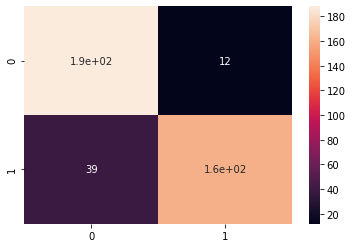

In [167]:
cm = confusion_matrix(Y,preds)
sns.heatmap(cm,annot = True)

In [168]:
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88       200
           5       0.93      0.81      0.86       200

    accuracy                           0.87       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



### Applying TF-IDF

In [169]:
reviews_count_vectorizer

<2000x18556 sparse matrix of type '<class 'numpy.int64'>'
	with 116065 stored elements in Compressed Sparse Row format>

In [170]:
%%time
from sklearn.feature_extraction.text import TfidfTransformer
reviews_tfidf = TfidfTransformer().fit_transform(reviews_count_vectorizer)

In [179]:
reviews_tfidf_X_test = TfidfTransformer().fit_transform(reviews_count_vectorizer_X)

In [171]:
reviews_tfidf.shape

(2000, 18556)

In [180]:
reviews_tfidf_X_test.shape

(400, 6149)

In [185]:
from sklearn.model_selection import train_test_split
X = reviews_tfidf
y = df['stars']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [186]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1600, 18556), (1600,), (400, 18556), (400,))

In [187]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [188]:
y_preds = NB_classifier.predict(X_test)

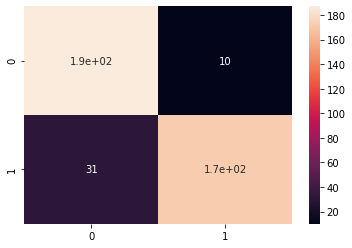

In [189]:
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot = True)

In [190]:
print("Accuracy of Naive Bayes Algorithm = ",accuracy_score(y_test,y_preds) * 100 ," %")

Accuracy of Naive Bayes Algorithm =  89.75  %


In [191]:
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88       200
           5       0.93      0.81      0.86       200

    accuracy                           0.87       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



## Bigger dataset of yelp 20K rows

In [193]:
b1 = df_stars_1.iloc[0:10000]
b5 = df_stars_5.iloc[0:10000]
b1_5 = pd.concat([b1,b5])
df = b1_5.sample(frac=1).reset_index(drop=True)
df.shape

(20000, 10)

**split dataset to X and y**

In [194]:
X,y = df['text'],df['stars']

**Apply Count Vectorizer on it**

**This cell will take much time**

In [195]:
%%time
vectorizer = CountVectorizer(analyzer=text_cleaning)
reviews_count_vectorizer_X = vectorizer.fit_transform(X)

Wall time: 12min 26s


### Applying TF-IDF

In [196]:
%%time
from sklearn.feature_extraction.text import TfidfTransformer
reviews_tfidf = TfidfTransformer().fit_transform(reviews_count_vectorizer_X)

Wall time: 104 ms


In [197]:
reviews_tfidf.shape

(20000, 62330)

### Data spliting to train and test

In [198]:
from sklearn.model_selection import train_test_split
X = reviews_tfidf
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [199]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16000, 62330), (4000, 62330), (16000,), (4000,))

In [200]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [201]:
y_preds = NB_classifier.predict(X_test)

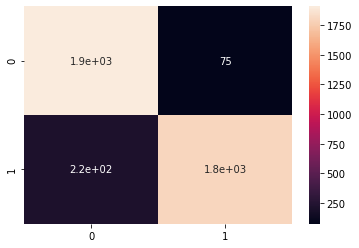

In [202]:
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot = True)

In [203]:
print("Accuracy of Naive Bayes Algorithm = ",accuracy_score(y_test,y_preds) * 100 ," %")

Accuracy of Naive Bayes Algorithm =  92.72500000000001  %


In [205]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93      1982
           5       0.96      0.89      0.93      2018

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

